Привет, Ярослав! 

Меня зовут Светлана Медведева и я буду проверять Твою работу. Предлагаю общаться на "ты". 

Просьба при доработке работы оставлять мои комментарии без изменений.

Комментарии я разделяю на следующие категории:

<div class="alert alert-block alert-success">
В случае если всё верно!
</div>


<div class="alert alert-block alert-warning">
В случае если можно что-то доработать, но эта доработка не критична или если есть варианты улучшения работы.
</div>

<div class="alert alert-block alert-danger">
Замечания, которые нужно исправить. Без исправления этих замечаний проект принят не может быть.
</div>

### <font color='blue'>Резензия на работу</font>
* Отличная работа, но в некоторых местах не помешали бы более детальные объяснения.
* Верно сформулированы и проверены гипотезы.
* Итоговый вывод относительно теста есть, но было бы здорово написать более развёрнутый вывод (с учётом анализа проведённого в предыдущих разделах).

# Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


# Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача
* Проанализируйте A/B-тест:
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

<div class="alert alert-block alert-warning">
Комментарий ревьюера:
    
Было бы здорово добавить оглавление со ссылками на разделы проекта и сформулировать своими словами цель проекта.
</div>

# Часть 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5

In [4]:
hypothesis.columns = map(str.lower, hypothesis.columns)

Применим фреймворк ICE u RICE для приоритизации гипотез:

In [5]:
hypothesis['ice'] = (hypothesis.impact * hypothesis.confidence / hypothesis.efforts).round(0)
display(hypothesis.sort_values('ice', ascending=False))
hypothesis['rice'] = (hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts).round(0)
hypothesis.sort_values('rice', ascending=False)

hypothesis  reach  impact  \
8  Запустить акцию, дающую скидку на товар в день...      1       9   
0  Добавить два новых канала привлечения трафика,...      3      10   
7  Добавить форму подписки на все основные страни...     10       7   
6  Показать на главной странице баннеры с актуаль...      5       3   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
1  Запустить собственную службу доставки, что сок...      2       5   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   

   confidence  efforts   ice  
8           9        5  16.0  
0           8        6  13.0  
7           8        5  11.0  
6           8        3   8.0  
2           7        3   7.0  
1           4       10   2.0  
3           3        8   1.0  
4           1        1   1.0  
5           2        3   1.0

hypothesis  reach  impact  \
7  Добавить форму подписки на все основные страни...     10       7   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
0  Добавить два новых канала привлечения трафика,...      3      10   
6  Показать на главной странице баннеры с актуаль...      5       3   
8  Запустить акцию, дающую скидку на товар в день...      1       9   
3  Изменить структура категорий, что увеличит кон...      8       3   
1  Запустить собственную службу доставки, что сок...      2       5   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   

   confidence  efforts   ice   rice  
7           8        5  11.0  112.0  
2           7        3   7.0   56.0  
0           8        6  13.0   40.0  
6           8        3   8.0   40.0  
8           9        5  16.0   16.0  
3           3        8   1.0    9.0  
1           4       10   2.0    4.0  
5           2        3   1.0    4.0  
4           1        1   1.0    3.0

## Вывод

В результате расчета ICE мы смогли приоритизировать гипотезы на основе оценок влияния на пользователей, сложности проверки и уверенности в наших оценках.

Далее мы включили в расчет охват пользователей, и рейтинг изменился. Это связано в первую очередь с тем, что у прошлых лидеров рейтинга был низкий охват пользоваетелей.

<div class="alert alert-block alert-success">
Комментарий ревьюера:
    
Верно отмечено различие между фреймворк ICE и RICE. Было бы нагляднее построить гистограмму оценок ICE и RICE  для гипотез на одном графике. 
</div>

___
# Часть 2

Рассмотрим данные

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
display(orders.head())
visitors.head()

transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756

In [8]:
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
orders.date = orders.date.astype('datetime64[D]')
visitors.date = visitors.date.astype('datetime64[D]')

In [10]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [11]:
len(orders.visitor_id.unique())

1031

In [12]:
len(orders.query('group == "A"').visitor_id.unique())

503

In [13]:
len(orders.query('group == "B"').visitor_id.unique())

586

Есть пользователи, которые попали в две группы, нужно их удалить

In [14]:
# создадим отдельные фреймы для каждой группы
orders_a = orders.query('group == "A"').copy()
orders_b = orders.query('group == "B"').copy()

id_in_two_groups = orders_a.merge(orders_b, on = 'visitor_id')['visitor_id'].drop_duplicates()
id_in_two_groups

0      4069496402
1       199603092
5      3803269165
9      2378935119
29      237748145
33     4256040402
61     2038680547
76     1738359350
78     2458001652
108    3891541246
110    2716752286
111    3656415546
112    2686716486
113    2954449915
114    2927087541
115    3234906277
116     457167155
119    2579882178
120    3957174400
121    1648269707
122    2780786433
124     818047933
125    2044997962
127    1959144690
128    3202540741
129    1333886533
130     351125977
131    3951559397
132     393266494
134    3984495233
136    4120364173
137    4266935830
138    1230306981
144    1294878855
146    1614305549
149       8300375
150     477780734
151    1668030113
153    3717692402
157    3766097110
158    3941795274
159     471551937
160    1316129916
161    1801183820
162    1602967004
163    2587333274
166    2600415354
167     232979603
168    3972127743
169    1404934699
171     276558944
172    3062433592
176    2654030115
177    3963646447
178    4186807279
180    271

In [15]:
orders_a = orders_a[~orders_a.visitor_id.isin(id_in_two_groups)]
orders_b = orders_b[~orders_b.visitor_id.isin(id_in_two_groups)]

<div class="alert alert-block alert-success">
Комментарий ревьюера:
    
Верно отмечено, что пользователей относящихся одновременно к обоим группам нужно удалить.
</div>

## 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [16]:
orders_a

transaction_id  visitor_id       date  revenue group
7         2626614568    78758296 2019-08-15     1044     A
8         1576988021   295230930 2019-08-15    13710     A
10        3649131742   879864040 2019-08-15     4008     A
12        2809384911  3213223594 2019-08-15     7370     A
14        3859315276  1565034404 2019-08-15    10980     A
...              ...         ...        ...      ...   ...
1185       948555526  2710193528 2019-08-14      730     A
1187      2274188238   132143192 2019-08-14      750     A
1188      1692103379  1022829655 2019-08-14      112     A
1193      2203539145   370388673 2019-08-14     3190     A
1194      1807773912   573423106 2019-08-14    10550     A

[468 rows x 5 columns]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


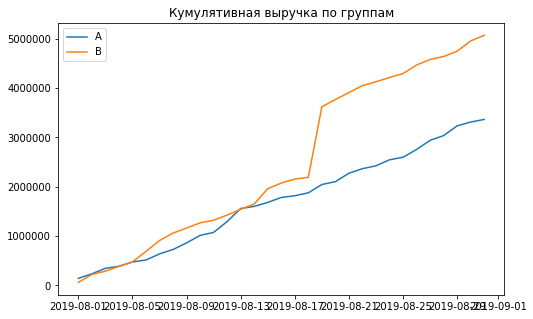

In [17]:
orders_a = orders_a.sort_values('date')
orders_b = orders_b.sort_values('date')

orders_a_cumulative = orders_a.groupby('date').agg({'revenue': 'sum',
                                                    'transaction_id':'nunique'
                                                   }).reset_index()
orders_b_cumulative = orders_b.groupby('date').agg({'revenue': 'sum',
                                                    'transaction_id':'nunique'
                                                   }).reset_index()

# добавим кумулятивную сумму заказов
orders_a_cumulative['revenue_cum'] = orders_a_cumulative.revenue.cumsum()
orders_b_cumulative['revenue_cum'] = orders_b_cumulative.revenue.cumsum()

# добавим кумулятивное количество заказов
orders_a_cumulative['transaction_cum'] = orders_a_cumulative.transaction_id.cumsum()
orders_b_cumulative['transaction_cum'] = orders_b_cumulative.transaction_id.cumsum()

# добавим средний чек
orders_a_cumulative['avg_check'] = orders_a_cumulative['revenue_cum'] / orders_a_cumulative['transaction_cum']
orders_b_cumulative['avg_check'] = orders_b_cumulative['revenue_cum'] / orders_b_cumulative['transaction_cum']


plt.figure(figsize=(8,5))
plt.plot(orders_a_cumulative['date'], orders_a_cumulative['revenue_cum'], label = "A")
plt.plot(orders_a_cumulative['date'], orders_b_cumulative['revenue_cum'], label = "B")
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.show()

По графику видно, что выручка больше от группы "В". 

Однако, обе линии местами резко растут, это может говорить о выбросах в данных.

<div class="alert alert-block alert-warning">
Комментарий ревьюера:
    
Да, резкий рост может быть связан с выбросами (одним или несколькими большими заказами). На графике отчётливо виден один скачок выручки у группы B.
    
Добавь, пожалуйста, подписи к осям графика. Пожалуйста, учти это и для других графиков. Правильное оформление графиков пригодится при подготовке отчётов и презентаций.
</div>

## 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

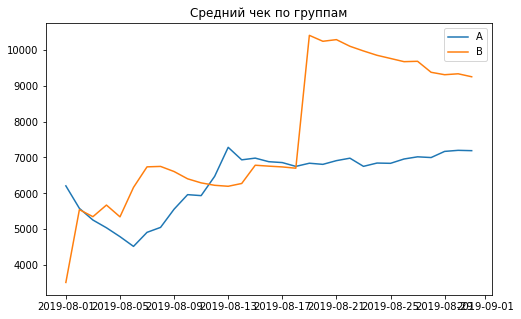

In [18]:
plt.figure(figsize=(8,5))
plt.plot(orders_a_cumulative.date, orders_a_cumulative['avg_check'], label = "A")
plt.plot(orders_a_cumulative.date, orders_b_cumulative['avg_check'], label = "B")
plt.legend()
plt.title('Средний чек по группам')
plt.show()

Для группа "А" средний чек стал равномерным примерно в середине месяца. Для группы "В" средний чек резко вырос, а позже начал постепенно снижаться.

Резкое изменение среднего чека для группы "В" может быть связано с большими заказами, но не понятно, почему снижение среднего чека постепенное, а не резкое.

<div class="alert alert-block alert-success">
Комментарий ревьюера:
    
Да, правильно описна динамика изменения величины среднего чека.
</div>

## 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [19]:
orders_b_cumulative

date  revenue  transaction_id  revenue_cum  transaction_cum  \
0  2019-08-01    59758              17        59758               17   
1  2019-08-02   162043              23       221801               40   
2  2019-08-03    67049              14       288850               54   
3  2019-08-04    96890              14       385740               68   
4  2019-08-05    89908              21       475648               89   
5  2019-08-06   214842              23       690490              112   
6  2019-08-07   219164              23       909654              135   
7  2019-08-08   150141              22      1059795              157   
8  2019-08-09   103166              19      1162961              176   
9  2019-08-10   105162              22      1268123              198   
10 2019-08-11    53060              12      1321183              210   
11 2019-08-12   104054              19      1425237              229   
12 2019-08-13   117691              20      1542928              249   
13 2019-08-14   107340              14      1650268              263   
14 2019-08-15   310159              26      1960427              289   
15 2019-08-16   114250              18      2074677              307   
16 2019-08-17    80865              13      2155542              320   
17 2019-08-18    35323               7      2190865              327   
18 2019-08-19  1429920              21      3620785              348   
19 2019-08-20   147274              20      3768059              368   
20 2019-08-21   140347              12      3908406              380   
21 2019-08-22   141728              21      4050134              401   
22 2019-08-23    77269              13      4127403              414   
23 2019-08-24    87866              14      4215269              428   
24 2019-08-25    79257              12      4294526              440   
25 2019-08-26   173439              22      4467965              462   
26 2019-08-27   111347              11      4579312              473   
27 2019-08-28    61198              22      4640510              495   
28 2019-08-29   106100              15      4746610              510   
29 2019-08-30   209223              21      4955833              531   
30 2019-08-31   113139              17      5068972              548   

       avg_check  
0    3515.176471  
1    5545.025000  
2    5349.074074  
3    5672.647059  
4    5344.359551  
5    6165.089286  
6    6738.177778  
7    6750.286624  
8    6607.732955  
9    6404.661616  
10   6291.347619  
11   6223.742358  
12   6196.497992  
13   6274.783270  
14   6783.484429  
15   6757.905537  
16   6736.068750  
17   6699.892966  
18  10404.554598  
19  10239.290761  
20  10285.278947  
21  10100.084788  
22   9969.572464  
23   9848.759346  
24   9760.286364  
25   9670.919913  
26   9681.420719  
27   9374.767677  
28   9307.078431  
29   9333.018832  
30   9249.948905

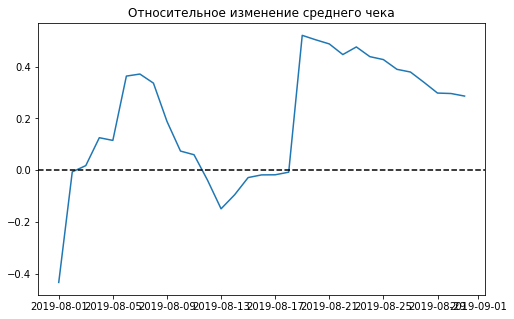

In [20]:
plt.figure(figsize=(8,5))
plt.plot(orders_b_cumulative.date, ((orders_b_cumulative['avg_check']) 
                                    / (orders_a_cumulative['avg_check'])
                                    - 1))
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение среднего чека')
plt.show()

На графике видно резкие скачки, кажется я третий раз повторяю одно и то же

<div class="alert alert-block alert-warning">
Комментарий ревьюера:
    
Да, здесь тоже есть резкие скачки :)
    
Разверни, пожалуйста, метки по оси абсцисс на 90 градусов, чтобы они не перекрывались.
</div>

## 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [21]:
orders_a_cumulative = pd.merge(orders_a_cumulative, visitors.query('group == "A"'), on = 'date', how = 'left')
orders_b_cumulative = pd.merge(orders_b_cumulative, visitors.query('group == "B"'), on = 'date', how = 'left')

orders_a_cumulative['conversion'] = orders_a_cumulative['transaction_cum'] / orders_a_cumulative['visitors'].cumsum()
orders_b_cumulative['conversion'] = orders_b_cumulative['transaction_cum'] / orders_b_cumulative['visitors'].cumsum()


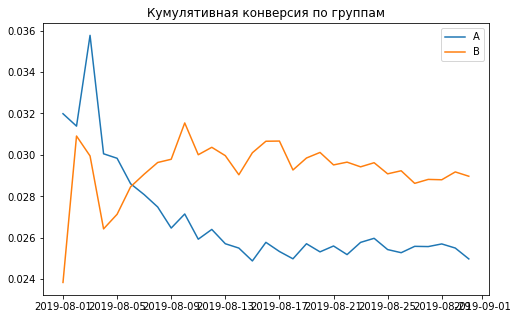

In [22]:
plt.figure(figsize=(8,5))
plt.plot(orders_a_cumulative.date, orders_a_cumulative['conversion'], label='A')
plt.plot(orders_b_cumulative.date, orders_b_cumulative['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.show()

На графике видно, что конверсия группы "В" больше, чем группы "А". 

## 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

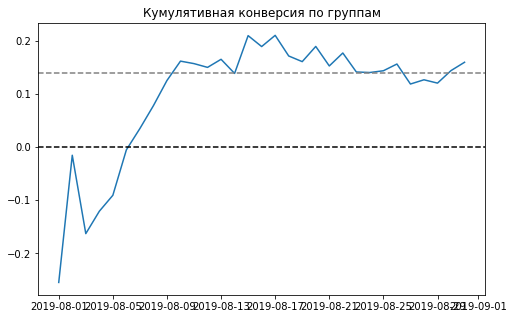

In [23]:
plt.figure(figsize=(8,5))
plt.plot(orders_a_cumulative.date, ((orders_b_cumulative['conversion'] / orders_a_cumulative['conversion'])-1))
plt.title('Кумулятивная конверсия по группам')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт.

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

(Выводы походу можно просто из теоретической части курса копировать)

<div class="alert alert-block alert-success">
Комментарий ревьюера:
    
Да, верно отмечено влияние аномалий на итоговый результат.
</div>

## 6-7. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

transaction_id
0.95             2.0
0.99             4.0

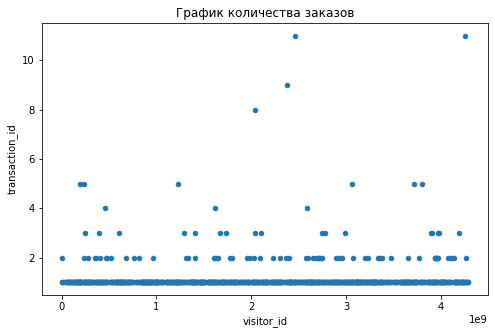

In [24]:
display(orders.groupby('visitor_id').agg({'transaction_id':'nunique'}).quantile([0.95, 0.99]))
orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'}).plot.scatter('visitor_id',
                                                                                           'transaction_id',
                                                                                           figsize=(8,5))
plt.title('График количества заказов')
plt.show()

Видно, что 95% пользователей делают не более 2 заказов в месяц. Выберем это значение в качестве границы

<div class="alert alert-block alert-success">
Комментарий ревьюера:
    
Всё верно, можно выбрать в качестве границы аномалий 2 заказа.
</div>

## 8-9. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

0.95    28000.0
0.99    58233.2
Name: revenue, dtype: float64

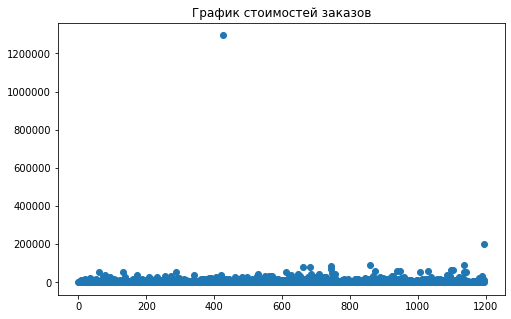

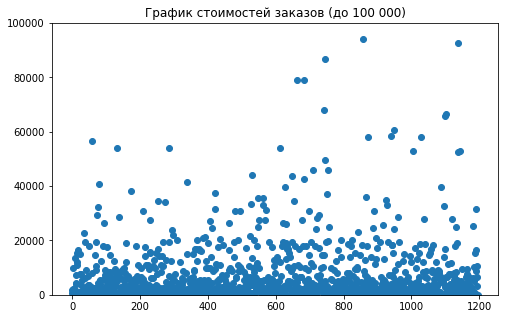

In [25]:
display(orders.revenue.quantile([0.95, 0.99]))
plt.figure(figsize=(8,5))
plt.scatter(range(orders.shape[0]), orders.revenue)
plt.title('График стоимостей заказов')
plt.show()
plt.figure(figsize=(8,5))
plt.scatter(range(orders.shape[0]), orders.revenue)
plt.title('График стоимостей заказов (до 100 000)')
plt.ylim(0,100000)
plt.show()

Видно, что 95% заказов не более 28 000. Выберем это значение в качестве границы

<div class="alert alert-block alert-success">
Комментарий ревьюера:
    
Молодец, что увеличил масштаб, так намного лучше виден разброс значений.
</div>

## 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Н0: разницы между выборками нет

Н1: разница между выборками есть

<div class="alert alert-block alert-success">
Комментарий ревьюера:
    
Молодец, что сформулировал нулевую и альтернативную гипотезы. Эта важная часть статистического теста.
</div>

In [26]:
orders_per_user_a = orders_a.groupby('visitor_id').agg({'transaction_id':'nunique'})
orders_per_user_b = orders_b.groupby('visitor_id').agg({'transaction_id':'nunique'})

orders_per_user_a = pd.concat([orders_per_user_a.transaction_id, 
                              pd.Series(0, index=np.arange(visitors.query('group == "A"').visitors.sum() - int(orders_per_user_a.sum())),name='transaction_id')], axis=0)
orders_per_user_b = pd.concat([orders_per_user_b.transaction_id, 
                              pd.Series(0, index=np.arange(visitors.query('group == "B"').visitors.sum() - int(orders_per_user_b.sum())),name='transaction_id')], axis=0)

In [27]:
print(f"Разница в конверсии между В и А = {float(orders_per_user_b.mean()/orders_per_user_a.mean()-1):.3f}")
stats.mannwhitneyu(orders_per_user_a, orders_per_user_b)[1]

Разница в конверсии между В и А = 0.160


0.005551068925767435

Так как p-value меньше 0.05, мы отвергаем нулевую гипотезу. Различие в конверсии между группами есть, в группе "В" конверсия больше (на основе разницы средних).

<div class="alert alert-block alert-success">
Комментарий ревьюера:
    
Да, верно :)
</div>

## 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Н0: разницы между выборками нет

Н1: разница между выборками есть

In [28]:
print(f"Разница в среднем чеке между В и А = {float(orders_b.revenue.mean()/orders_a.revenue.mean()-1):.3f}")
stats.mannwhitneyu(orders_a.revenue, orders_b.revenue)[1]

Разница в среднем чеке между В и А = 0.287


0.41474544990747664

Так как p-value больше 0.05, отвергнуть нулевую гипотезу нельзя. По сырым данным различий в среднем чеке групп нет.

## 12.Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [29]:
bad_id_a = orders_a.groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'})
bad_id_a = bad_id_a[bad_id_a.transaction_id > 2]['visitor_id']

bad_id_b = orders_b.groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'})
bad_id_b = bad_id_b[bad_id_b.transaction_id > 2]['visitor_id']


orders_clear_a = orders_a.query('revenue < 28001 and visitor_id.isin(@bad_id_a) == False')
orders_clear_b = orders_b.query('revenue < 28001 and visitor_id.isin(@bad_id_b) == False')

orders_per_user_clear_a = orders_clear_a.groupby('visitor_id').agg({'transaction_id':'nunique'})
orders_per_user_clear_b = orders_clear_b.groupby('visitor_id').agg({'transaction_id':'nunique'})

orders_per_user_clear_a = pd.concat([orders_per_user_clear_a.transaction_id, 
                              pd.Series(0, index=np.arange(visitors.query('group == "A"').visitors.sum() - int(orders_per_user_clear_a.sum())),name='transaction_id')], axis=0)
orders_per_user_clear_b = pd.concat([orders_per_user_clear_b.transaction_id, 
                              pd.Series(0, index=np.arange(visitors.query('group == "B"').visitors.sum() - int(orders_per_user_clear_b.sum())),name='transaction_id')], axis=0)

In [30]:
print(f"Разница в конверсии между В и А = {float(orders_per_user_clear_b.mean()/orders_per_user_clear_a.mean()-1):.3f}")
stats.mannwhitneyu(orders_per_user_clear_a, orders_per_user_clear_b)[1]

Разница в конверсии между В и А = 0.186


0.005191127893750812

Так как p-value меньше 0.05, мы отвергаем нулевую гипотезу. Различие в конверсии между группами есть, в группе "В" конверсия больше (на основе разницы средних).

## 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [31]:
print(f"Разница в среднем чеке между В и А = {float(orders_clear_b.revenue.mean()/orders_clear_a.revenue.mean()-1):.3f}")
stats.mannwhitneyu(orders_clear_a.revenue, orders_clear_b.revenue)[1]

Разница в среднем чеке между В и А = -0.029


0.3590626061231671

<div class="alert alert-block alert-warning">
Комментарий ревьюера:
    
Добавь, пожалуйста, формулировку нулевой и альтернативной гипотез. Учти это, пожалуйста, и в остальных статистических тестах.
</div>

Так как p-value больше 0.05, отвергнуть нулевую гипотезу нельзя. Различий в среднем чеке групп нет.

## 14. Примите решение по результатам теста и объясните его.

Рассмотрим еще раз график кумулятивной выручки по группам без выбросов

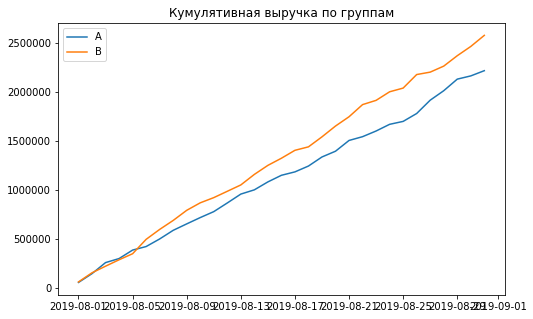

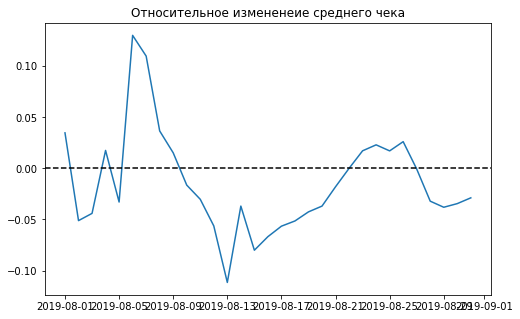

In [32]:
orders_a_cumulative1 = orders_clear_a.groupby('date').agg({'revenue': 'sum',
                                                    'transaction_id':'nunique'
                                                   }).reset_index()
orders_b_cumulative1 = orders_clear_b.groupby('date').agg({'revenue': 'sum',
                                                    'transaction_id':'nunique'
                                                   }).reset_index()

# добавим кумулятивную сумму заказов
orders_a_cumulative1['revenue_cum'] = orders_a_cumulative1.revenue.cumsum()
orders_b_cumulative1['revenue_cum'] = orders_b_cumulative1.revenue.cumsum()


# добавим кумулятивное количество заказов
orders_a_cumulative1['transaction_cum'] = orders_a_cumulative1.transaction_id.cumsum()
orders_b_cumulative1['transaction_cum'] = orders_b_cumulative1.transaction_id.cumsum()

# добавим средний чек
orders_a_cumulative1['avg_check'] = orders_a_cumulative1['revenue_cum'] / orders_a_cumulative1['transaction_cum']
orders_b_cumulative1['avg_check'] = orders_b_cumulative1['revenue_cum'] / orders_b_cumulative1['transaction_cum']


plt.figure(figsize=(8,5))
plt.plot(orders_a_cumulative1['date'], orders_a_cumulative1['revenue_cum'], label = "A")
plt.plot(orders_b_cumulative1['date'], orders_b_cumulative1['revenue_cum'], label = "B")
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.show()

plt.figure(figsize=(8,5))
plt.plot(orders_b_cumulative1.date, (orders_b_cumulative1['avg_check'] / orders_a_cumulative1['avg_check'] - 1))
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное измененеие среднего чека')
plt.show()

На основе проведенных сравнений можно сказать, что конверсия больше в группе "В", а средний чек в группах примерно одинаковый. Я бы продолжил тест, чтобы посмотреть на дальнейшую динамику изменения среднего чека. 

<div class="alert alert-block alert-success">
Комментарий ревьюера:
    
Да, аргументированный вывод. В общем выводе нужно более подробно описывать выводы, закономерности найденные в ходе реализации проекта.
</div>

In [33]:
# из теории

# datesGroups = orders[['date','group']].drop_duplicates() 
# ordersAggregated = (
#     datesGroups
#     .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
#            .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique,
#                  'visitor_id' : pd.Series.nunique,
#                  'revenue' : 'sum'}), axis=1)
#     .sort_values(by=['date','group']) 
# )

# plt.figure(figsize=(8,5))
# plt.plot(ordersAggregated.query('group == "A"').date, ordersAggregated.query('group == "A"').revenue, label = 'A')
# plt.plot(ordersAggregated.query('group == "B"').date, ordersAggregated.query('group == "B"').revenue, label = 'B')
# plt.legend()
# plt.title('Кумулятивная выручка по группам')
# plt.show()

In [34]:
# visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
# plt.legend() 

In [35]:
# # собираем данные в одном датафрейме
# mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# # cтроим отношение средних чеков
# plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# plt.axhline(y=0, color='black', linestyle='--') 

In [36]:
# # считаем кумулятивную конверсию
# cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# # отделяем данные по группе A
# cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# # отделяем данные по группе B
# cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# # строим графики
# plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
# plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
# plt.legend()

In [37]:
# mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
# plt.legend()

# plt.axhline(y=0, color='black', linestyle='--')
# plt.axhline(y=-0.1, color='grey', linestyle='--')
# # plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6]) 